## LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## DATA PREPROCESSING

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
class_name = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [5]:
x_train.max(), x_train.min()

(255, 0)

In [6]:
y_train.max(), y_train.min()

(9, 0)

In [7]:
class_name

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [8]:
# Normalize the images

x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train.max(), x_train.min()

(1.0, 0.0)

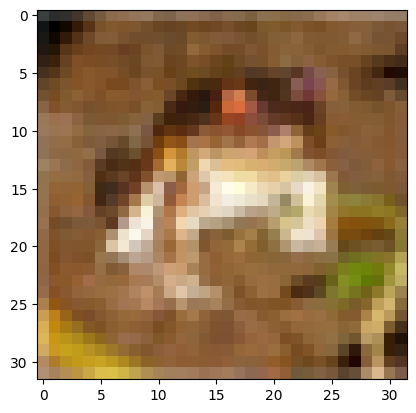

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
class_name

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

## BUILDING CNN

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3])) # first convolutional layer 5 parameters

c:\Users\micke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Adding second CNN layer and maxpool layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')) 


In [15]:
# Adding third CCN layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))


In [16]:
# Adding four CNN layer and maxpool layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')) 


In [17]:
# Adding dropout layer

model.add(tf.keras.layers.Dropout(0.4))

In [18]:
# Adding flattening layer

model.add(tf.keras.layers.Flatten())

In [19]:
# Adding first dense layers

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [20]:
# Adding second dense layer

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## TRAINING THE MODEL

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [23]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.6988 - sparse_categorical_accuracy: 0.3780
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 1.0641 - sparse_categorical_accuracy: 0.6254
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.8977 - sparse_categorical_accuracy: 0.6845
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.7888 - sparse_categorical_accuracy: 0.7196
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.7086 - sparse_categorical_accuracy: 0.7490
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.6543 - sparse_categorical_accuracy: 0.7692
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 0.6020 - sparse_categorical_accuracy: 0.7856
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.5602 - sparse_categorical_accuracy: 0.7993
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.5271 - sparse_categorical_accuracy: 0.8143
Epoch 10/10
5000/5000 ━━━━━━

In [24]:
model.save('model.h5')

In [25]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

## MODEL EVALUATION AND PREDICTION

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7576 - sparse_categorical_accuracy: 0.7507


In [27]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
y_pred[100], y_test[100]

(4, array([4], dtype=uint8))

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[790,  18,  51,  19,  12,   1,   6,  12,  55,  36],
       [ 10, 854,   4,  11,   0,   5,   2,   3,  13,  98],
       [ 55,   4, 689,  56,  73,  28,  48,  31,   9,   7],
       [ 24,   9,  73, 601,  57, 101,  54,  52,  12,  17],
       [ 25,   2,  86,  76, 659,  17,  48,  71,   7,   9],
       [ 13,   5,  62, 201,  52, 560,  21,  69,   4,  13],
       [  7,  11,  52,  77,  33,  16, 784,   6,  10,   4],
       [ 11,   2,  32,  42,  49,  33,   4, 811,   5,  11],
       [ 51,  30,  18,  10,   6,   5,   2,   5, 843,  30],
       [ 23,  48,   7,  12,   6,   3,   3,  17,  17, 864]], dtype=int64)

In [30]:
acc = accuracy_score(y_test, y_pred)
acc

0.7455